## Modified Problem Statement

Consider the a force-displacement relation for a beam with a single degree of freedom x with the logarithmic nonlinear strain:

$R(x) = (\frac{EVx}{D^2 + x^2}ln\frac{\sqrt{D^2 + x^2}}{L}) - F = 0$<br>

(a) Solve R(x) = 0 for x given F using the standard Newton-Raphson algorithm<br>
    1) Consider first the increasing force vector $F=[-0.25,-0.24,-0.23, ..., 0, 0.01, 0.02, ...,0.25]$.
    Solve for the corresponding x for each force using the standard Newton Raphson algorithm and
    using as initial guess the solution for the previous force value. The first guess for $F = 0.25$ is
    up to you.<br>
    2) Consider the decreasing force vector $F=[0.25,0.24,0.23, ..., 0, -0.01, -0.02, ...,-0.25]$.
    Solve for the corresponding x for each force using the standard Newton Raphson algorithm and
    using as initial guess the solution for the previous force value. The first guess for $F = 0.25$ is
    up to you.<br>
    3) Plot together the two solutions above.<br>
 b) You will get the curve $x, F$ using the arc length method. Assume that you have found at least
    one point in the path $x_0 = [x_0, F_0]$. The new system of equations is to find a nearby point
    $x = x_0 + \Delta x$ such that:
    
$R_1(\Delta x) = (\frac{EVx}{D^2 + x^2}ln\frac{\sqrt{D^2 + x^2}}{L}) - F = 0$,
    
where $x = x_0 + \Delta x$ and $F = F_0 + \Delta F$. We need one more constraint. We want this new point to
be a distance $A$ from the previous point :
$R_2(\Delta x) = (\Delta x)^2 + (\alpha\Delta F)^2 - A^2 = 0$. 
The numbers $\alpha$ and $A$ are parameters you can control.  The parameters $\alpha$ is a scaling of the force
because in the original space of search the force and the displacement might vary at different
rate as you move along the path. The second parameter, $A$ controls the distance you move in
the $x, \alpha F$ space. The new system is now two equations for the two unknowns. You can solve
this system with the standard Newton Raphson. You just need to start from a point near or on
the path. Use this method to get the full path.
    

## Solution

a)  First, we compute the derivative of $R(x)$:

$\frac{d}{dx}(\frac{EVx}{D^2 + x^2}ln\frac{\sqrt{D^2 + x^2}}{L}) = EV\frac{x^2 + (D^2 - x^2)ln(\frac{\sqrt{D^2 + x^2}}{L})}{(D^2 + x^2)^2}$

In [4]:
# Constant values
from IPython.display import Math
import numpy as np

E = 1.0 # Pa
D = 1.0 # m
V = 1.0 #m^3
L = 1.2 #m

# Function for residual
def res(x,f):
    return E*V*x*np.log(np.sqrt(x**2 + D**2)/L)/(D**2 + x**2) - f

# Function for dR/dx
def dres(x):
    return E*V*(x**2 + (D**2 - x**2)*np.log(np.sqrt(x**2 + D**2)/L))/(D**2 + x**2)**2

Now, a function calculating the solution to $\textbf{R}(x) = 0$ given a value of $f$ using Newton-Rhapson is written. The tolerance is chosen to be $10^{-5}$:

In [5]:
# Newton Raphson given f and initial guess x0

def NR(f,x0):
    x_sol = x0 # Initialize the solution vector
    tol = 1e-5 # Tolerance
    itermax=100 # Max. no. of iterations
    iter=0 # Initialize iteration counter
    x_iter = [x_sol] # List containing iteration history
    while np.abs(res(x_sol,f))>tol and iter<itermax:
        x_sol -= res(x_sol,f)/dres(x_sol) # x_(i+1) = x_i - R(x_i)/R'(x_i)
        x_iter.append(x_sol) # Update iteration history list
        iter+=1 # Update iteration counter
    print('Iterations: %i'%(iter))
    print('solution,  for f=%f, x=%f '%(f,x_sol))
    return x_sol # Return final solution

1) The displacement for each force value in the increasing force vector $F = [-0.25,-0.24 \dots 0.25]$ is calculated below:

In [6]:
# Increasing force vector
F = np.linspace(-0.25,0.25,num=51)

# Initialize the solution vector
x_inc = np.zeros(F.size)

# Initial guess for f=-0.25
x_0 = -1.0

for i,f in enumerate(F):
    if i == 0:
        x_inc[i] = NR(f,x_0)
    else:
        x_inc[i] = NR(f,x_inc[i-1]) # Use solution from previous calculation as initial guess

Iterations: 4
solution,  for f=-0.250000, x=-2.012305 
Iterations: 2
solution,  for f=-0.240000, x=-1.902136 
Iterations: 2
solution,  for f=-0.230000, x=-1.806835 
Iterations: 2
solution,  for f=-0.220000, x=-1.722439 
Iterations: 2
solution,  for f=-0.210000, x=-1.646440 
Iterations: 2
solution,  for f=-0.200000, x=-1.577096 
Iterations: 2
solution,  for f=-0.190000, x=-1.513145 
Iterations: 2
solution,  for f=-0.180000, x=-1.453636 
Iterations: 2
solution,  for f=-0.170000, x=-1.397833 
Iterations: 2
solution,  for f=-0.160000, x=-1.345151 
Iterations: 2
solution,  for f=-0.150000, x=-1.295114 
Iterations: 2
solution,  for f=-0.140000, x=-1.247326 
Iterations: 2
solution,  for f=-0.130000, x=-1.201451 
Iterations: 2
solution,  for f=-0.120000, x=-1.157197 
Iterations: 2
solution,  for f=-0.110000, x=-1.114304 
Iterations: 2
solution,  for f=-0.100000, x=-1.072537 
Iterations: 2
solution,  for f=-0.090000, x=-1.031676 
Iterations: 2
solution,  for f=-0.080000, x=-0.991507 
Iterations

2) The displacement for each force value in the decreasing force vector $F = [0.25,0.24 \dots -0.25]$ is calculated below:

In [7]:
# Increasing force vector by reversing F
F1 = F[::-1]

# Initialize the solution vector
x_dec = np.zeros(F1.size)


# Initial guess for f=0.25
x_0 = 1.0

for i,f in enumerate(F1):
    if i == 0:
        x_dec[i] = NR(f,x_0)
    else:
        x_dec[i] = NR(f,x_dec[i-1]) # Use solution from previous calculation as initial guess

Iterations: 4
solution,  for f=0.250000, x=2.012305 
Iterations: 2
solution,  for f=0.240000, x=1.902136 
Iterations: 2
solution,  for f=0.230000, x=1.806835 
Iterations: 2
solution,  for f=0.220000, x=1.722439 
Iterations: 2
solution,  for f=0.210000, x=1.646440 
Iterations: 2
solution,  for f=0.200000, x=1.577096 
Iterations: 2
solution,  for f=0.190000, x=1.513145 
Iterations: 2
solution,  for f=0.180000, x=1.453636 
Iterations: 2
solution,  for f=0.170000, x=1.397833 
Iterations: 2
solution,  for f=0.160000, x=1.345151 
Iterations: 2
solution,  for f=0.150000, x=1.295114 
Iterations: 2
solution,  for f=0.140000, x=1.247326 
Iterations: 2
solution,  for f=0.130000, x=1.201451 
Iterations: 2
solution,  for f=0.120000, x=1.157197 
Iterations: 2
solution,  for f=0.110000, x=1.114304 
Iterations: 2
solution,  for f=0.100000, x=1.072537 
Iterations: 2
solution,  for f=0.090000, x=1.031676 
Iterations: 2
solution,  for f=0.080000, x=0.991507 
Iterations: 2
solution,  for f=0.070000, x=0.9

3) The solutions for $x$ based on increasing and decreasing force values are plotted below:

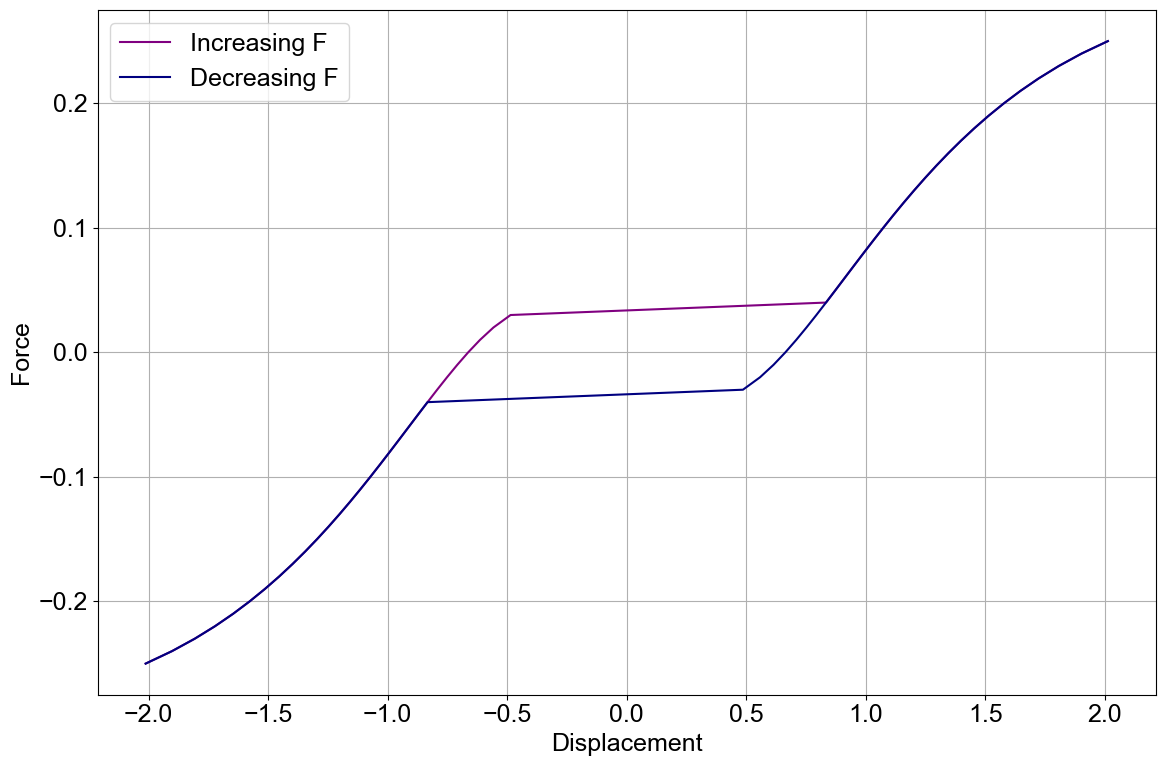

In [10]:
import matplotlib
from matplotlib import pyplot as plt

n_pts = 100
x = np.linspace(-1.1,1.1,n_pts)

font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(x_inc,F,label='Increasing F',color=[0.5,0,0.5])
plt.plot(x_dec,F1,label='Decreasing F',color=[0.0,0,0.5])
plt.legend(loc=2)
plt.xlabel('Displacement')
plt.ylabel('Force')
plt.grid()
plt.tight_layout()
plt.show()

From the plot above, it can be seen that the increasing solution curve(and decreasing one as well from the positive end) jumps solutions. This is a consequence of the way Newton-Rhapson iterations traverse the curve based on the slope, whose sign is determined  by the given initial guess. Consider the example of the increasing force vector (the phenomenon can be similarly explained for the decreasing one as well). At the jump over point, the slope is positive, as the initial guess is a based on the solution for a smaller force value. This causes the iteration process to completely skip the intermediate solution, which can be reached only if the sign of the slope were to be flipped (from positive to negative). Had the initial guess at this step been something around -0.2, the other solution would have been obtained.

b) As in part a), we evaluate the residual and the derivative (Jacobian). Note that in this case, $\textbf{x} = \begin{bmatrix} \Delta x \\ \Delta F \end{bmatrix}$ and $\textbf{x0} = \begin{bmatrix} x_0 \\ f_0 \end{bmatrix}$

In [11]:
# Function definition of R(x)
def RES(x,x0,alpha,A):
    res1 = E*V*(x[0] + x0[0])*np.log(np.sqrt((x[0] + x0[0])**2 + D**2)/L)/(D**2 + (x[0] + x0[0])**2) - (x[1] + x0[1])
    res2 = x[0]**2 + (alpha*(x[1]**2)) - A
    return np.array([res1,res2])

# Function definition of the Jacobian
# Note that dR_1/dx_1 as a form similar to the derivative computed in part a), with x replaced by x + \Delta x
def DRES(x,x0,alpha):
    dres1dx1 = E*V*((x[0] + x0[0])**2 + (D**2 - (x[0] + x0[0])**2)*np.log(np.sqrt((x[0] + x0[0])**2 + D**2)/L))/(D**2 + (x[0] + x0[0])**2)**2
    dres1dx2 = -1.0
    dres2dx1 = 2.0*x[0]
    dres2dx2 = 2.0*alpha*x[1]
    return np.array([[dres1dx1,dres1dx2],[dres2dx1,dres2dx2]])

Now, a function calculating the solution to $\textbf{R}(\textbf{x}) = 0$ using Newton-Rhapson is written. The tolerance is chosen to be $10^{-5}$, much more conservative as compared to the lecture codes:

In [12]:
def NR1(x0,alpha,A):
    x_sol = np.array([0.01,0.01]) # Initialize the solution vector
    tol = 1e-5 # Tolerance
    itermax=100 # Max. no. of iterations
    iter=0 # Initialize iteration counter
    x1_iter = [x_sol[0]] # Iteration history for x[0]
    x2_iter = [x_sol[1]] # Iteration history for x[1]
    while np.linalg.norm(RES(x_sol,x0,alpha,A))>tol and iter<itermax:
        x_sol -= np.linalg.solve(DRES(x_sol,x0,alpha),RES(x_sol,x0,alpha,A)) # x_(i+1) = x_i - J^{-1}R
        x1_iter.append(x_sol[0]) # Update x[0] iteration history
        x2_iter.append(x_sol[1]) # Update x[1] iteration history
        iter+=1
    print('Iterations: %i'%(iter))
    print('solution x=%f,%f '%(x_sol[0],x_sol[1]))
    return x_sol # Return final converged solution

By convention, we start from the negative end of f, working towards the positive side.

In [13]:
# Initial point that lies on the solution curve
x_0 = np.array([-2.012305,-0.25])

# Lists of the solution vectors
x = [x_0[0]]
f = [x_0[1]]

alpha = 0.05 # Parameter defining scaling between f and x
A = 0.002 # Parameter controlling extent of search neighbourhood
i=1 # Initialize iteration counter

# The search is performed untill a force value of 0.25 is reached, 
# to conform with extents of earlier parts of the problem
while f[-1] <= 0.25:
    if f[-1] == -0.25:
        sol = NR1(x_0,alpha,A)
        x.append(x[0] + sol[0]) # Note that here, the solutions are the incremental lengths of x and f
        f.append(f[0] + sol[1]) # Hence, they must be added to the initial point to obtain the new point on the curve
    else:
        sol = NR1(np.array([x[-1],f[-1]]),alpha,A) # Use previous point as an initial point
        x.append(x[-1] + sol[0])
        f.append(f[-1] + sol[1])

Iterations: 4
solution x=0.044774,0.003877 
Iterations: 4
solution x=0.044773,0.004134 
Iterations: 4
solution x=0.044771,0.004404 
Iterations: 4
solution x=0.044770,0.004687 
Iterations: 4
solution x=0.044768,0.004983 
Iterations: 4
solution x=0.044766,0.005292 
Iterations: 4
solution x=0.044764,0.005614 
Iterations: 4
solution x=0.044762,0.005948 
Iterations: 4
solution x=0.044759,0.006295 
Iterations: 4
solution x=0.044756,0.006653 
Iterations: 4
solution x=0.044753,0.007021 
Iterations: 4
solution x=0.044750,0.007399 
Iterations: 4
solution x=0.044747,0.007783 
Iterations: 4
solution x=0.044743,0.008173 
Iterations: 4
solution x=0.044739,0.008564 
Iterations: 4
solution x=0.044735,0.008954 
Iterations: 4
solution x=0.044731,0.009338 
Iterations: 4
solution x=0.044727,0.009711 
Iterations: 4
solution x=0.044723,0.010067 
Iterations: 4
solution x=0.044719,0.010398 
Iterations: 4
solution x=0.044715,0.010696 
Iterations: 4
solution x=0.044712,0.010952 
Iterations: 4
solution x=0.04470

The plot for the solution curve obtained using the above method is plotted below:

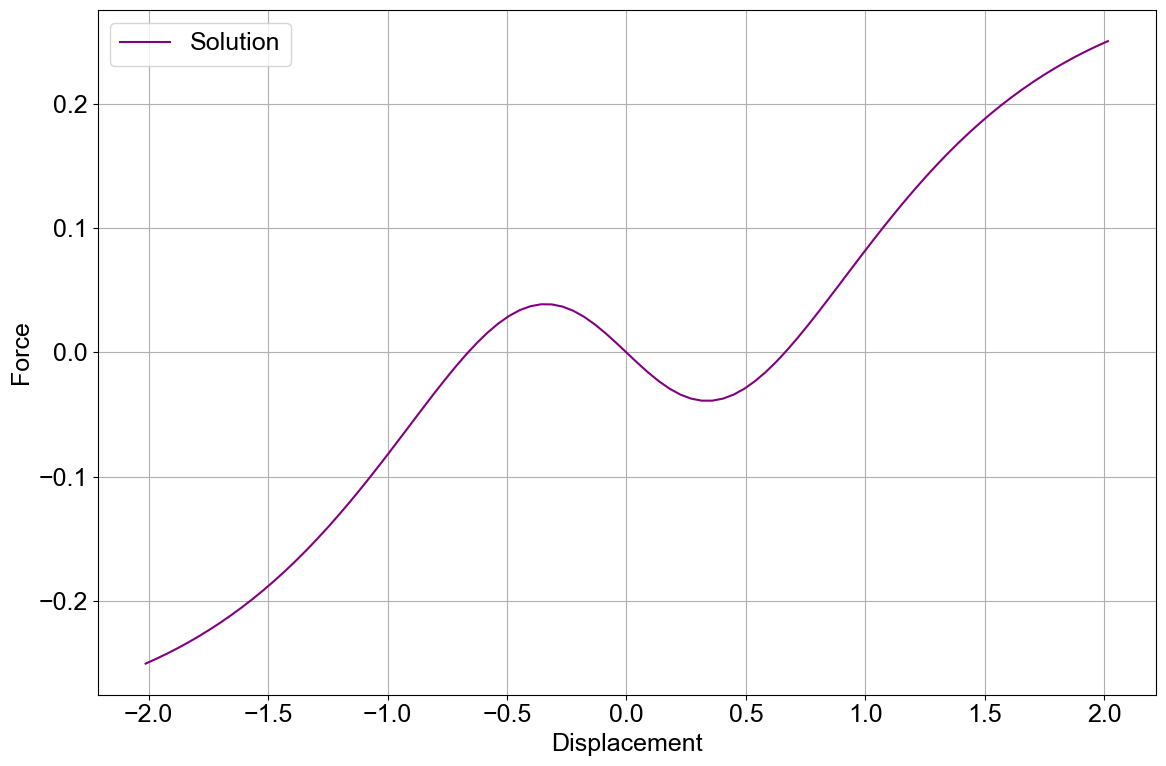

In [14]:
# Defining the exact curve
n_pts = 100

font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(x,f,label='Solution',color=[0.5,0,0.5])
plt.legend(loc=2)
plt.xlabel('Displacement')
plt.ylabel('Force')
plt.grid()
plt.tight_layout()
plt.show()